<a href="https://colab.research.google.com/github/LuizFLFjr/Aprendizado-de-maquina-2/blob/main/Clusteriza%C3%A7%C3%A3o_e_Visualiza%C3%A7%C3%A3o_do_Conjunto_de_Dados_Iris_com_K_Means%2C_PCA_e_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

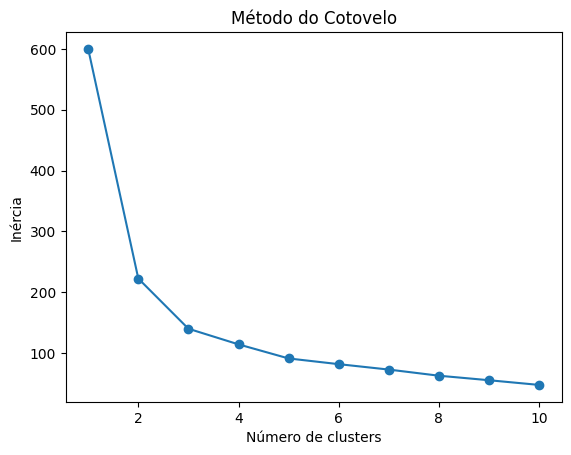

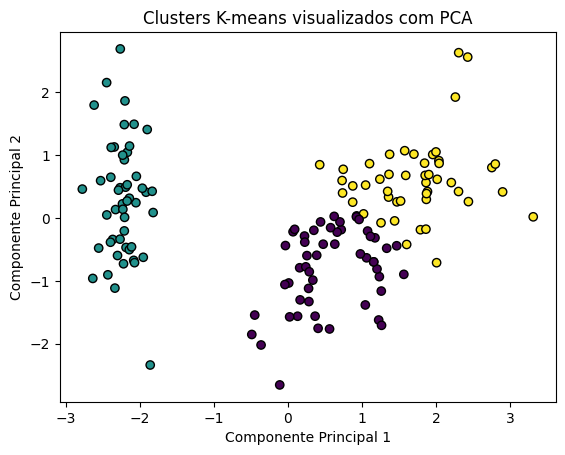

Variância explicada pelos 2 componentes: 95.81%


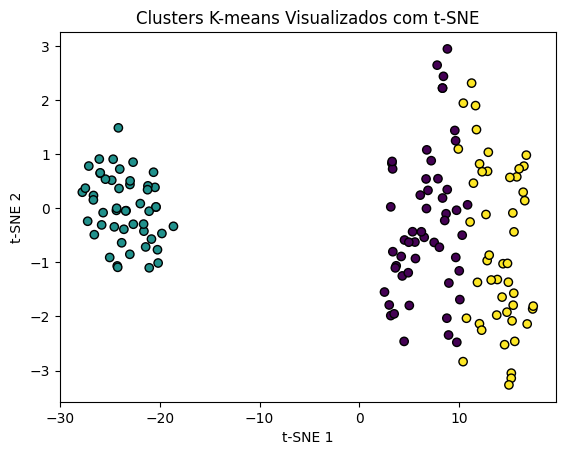

PCA reduz os dados para 2D mantendo a maior parte da variância, enquanto t-SNE foca em preservar vizinhanças locais, geralmente mostrando clusters mais bem separados.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Carregar o dataset Iris
dice = datasets.load_iris()
X = dice.data

# Normalizar os dados para melhor desempenho do K-means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Método do cotovelo para determinar o número ideal de clusters
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotando o método do cotovelo
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

# Definir número de clusters (supondo que o cotovelo indica k=3)
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_scaled)

# Aplicar PCA para reduzir para 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar os clusters com PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis', edgecolors='k')
plt.title('Clusters K-means visualizados com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Variância explicada
print(f"Variância explicada pelos 2 componentes: {sum(pca.explained_variance_ratio_):.2%}")

# Aplicar t-SNE para visualização
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Visualizar os clusters com t-SNE
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_kmeans, cmap='viridis', edgecolors='k')
plt.title('Clusters K-means Visualizados com t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

# Explicação dos resultados
print("PCA reduz os dados para 2D mantendo a maior parte da variância, enquanto t-SNE foca em preservar vizinhanças locais, geralmente mostrando clusters mais bem separados.")